# Day 16 In-Class Assignment: Introduction to Machine Learning 


<img src="https://goo.gl/FYHM5q" width=600pc >
<p style="text-align: right;">Image from: https://goo.gl/ypY9G2</p>

1. **Scientific motivation** 
    - Classifying data (iris types) 
2. **Modeling tools** 
    - Machine Learning (Perceptron)
3. **Programming concepts** 
    - Creating Classes and re-usable code
    - Pulling in data from outside sources 
    - Using external libraries 
    

### Agenda for today's class

</p>

1. Review of pre-class assignment
1. Problem Statement
1. Basics of the perceptron model
1. Loading and inspecting the data
1. Building the perceptron model
1. Plotting the decision boundary


----
# 1. Review of pre-class assignment

Were there any specific questions that came up in the pre-class assignment?

# 2. Problem Statement
    

We want to build a model that can accurately classifying two types of flowers based off of measurements we have collected. Building this model will allow us to understand how basic machine learning models learn and what exactly is happening 'under the hood'. It will provide a slightly more intuitive view of machine learning and make it seem as less of a black box and more of a tool that we understand. 

# 3. The Basics of the Perceptron Model

The perceptron is a what is known as a basic binary classifier. It takes in a set of training data that is linerally separable and then computes a *set of weights* and a *bias term* to apply to input data as to properly classify it. Perceptrons only works for data that contains two classes and is linearly separable. For data that does not have these properties, the classifier cannot properly learn the weights and bias term.

Since the perceptron is based on linearly separable data, we can think of the model as trying to learn the slope of a line, $y = m~x + b$. However in machine learning, we usually define $X$ to be an input *vector*, which is a $1$ by $N$ matrix, where $N$ is the number of measurements or "features" for a given sample. Then, we can create a similar matrix of weights, $W$, also of length N, and re-write our equation to be:

$$ Y = W \cdot X + B$$

where $Y$ represents the resulting classification, consisting of either -1 or 1, depending on the output of $W \cdot X$, the dot product of $W$ and $X$, and $B$ represents the bias term.  More explicitly, we can look at this in a matrix format:

$$ Y = \begin{bmatrix} w_1 & w_2 & \dots & w_n \end{bmatrix} \cdot \begin{bmatrix} x_1 \\ x_2 \\ \vdots \\ x_n \end{bmatrix} + B $$

But, **how do we go about learning the weights of the model?**

We learn the model weights by attempting to predict the class of our input data using an initial guess for the weights, and then update our weight values based on our prediction. We can define a "step size" for how much we change our weight between subsequent guess in the following way:

`step_size = eta * (target class - predicted class)` 

Then, using our "step size", we then update all of our weights by multiplying our *step size times the corresponding feature values*:

$$w_{1,new} = w_{1,old} + (\mathrm{step~size} \times x_{1,i})$$
$$w_{2,new} = w_{2,old} + (\mathrm{step~size} \times x_{2,i})$$
$$ \vdots $$
$$w_{N,new} = w_{N,old} + (\mathrm{step~size} \times x_{N,i})$$

We also have to update our bias term, but just use the step size for this update: $B_{new} = B_{old} + \mathrm{step~size}$).

In this model, we use `eta` to represent our "learning_rate", which takes on a value between 0 and 1.

The step size should always be a positive or negative decimal value depending on `eta`. For example, if we set the learning rate, `eta`, to be .1 and our target is -1 and we predict 1 then the we get the following equation.

`step_size = .1 * (-1-1) = -.2`
   
Alternativey, if our target is 1 and we predict it as -1 then we will get the following.

`step_size = .1 * (1 - -1) = .2`

This process occurs iteratively. So, for a set number of iterations we calculate a step size and adjust the weights accordingly.

**But, how do we handle the "learning" process when we have multiple samples?**

In this case, we need to update the weights based on _all_ of the sample features. So our original equation above becomes:

$$w_{1,new} = w_{1,old} + \sum_{i=0}^{M} (\mathrm{step~size} \times x_{1,i})$$
$$w_{2,new} = w_{2,old} + \sum_{i=0}^{M} (\mathrm{step~size} \times x_{2,i})$$
$$ \vdots $$
$$w_{N,new} = w_{N,old} + \sum_{i=0}^{M} (\mathrm{step~size} \times x_{N,i})$$

where $M$ is our total number of samples and we compute new weights for every features value.

# 4. Loading and inspecting the data

Before we build a machine learning model, we need data to base it off of. The data set we are going to use has been provided for you in the directory for this assignment, `irsi.csv`. This dataset contains measurements for the properties of two different iris varieties.

**Load the data into python and visualize (with a plot) to get a sense for what it looks like. Use different colors to represent the two different iris classifications.**

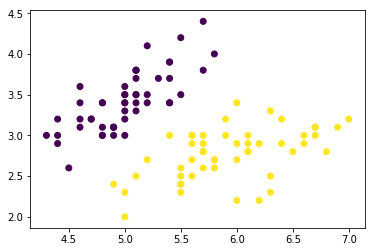

100


In [35]:
# Do This: Load in the iris.csv file and plot the data based on the iris classifications
import csv
import matplotlib.pyplot as plt
import numpy as np

sepal_length = []
sepal_width = []
label = []
with open('iris.csv', 'r') as data:
    datareader = csv.reader(data, delimiter=',', quotechar='|')
    for i,row in enumerate(datareader):
        if i == 0:
            continue
        sepal_length.append(float(row[0]))
        sepal_width.append(float(row[1]))
        label.append(row[2])

colors = []
for i in label:
    if i == 'Iris-setosa':
        colors.append(-1)
    elif i == 'Iris-versicolor':
        colors.append(1)
    else:
        colors.append(2)

dataset = np.vstack((np.asarray(sepal_length), np.asarray(sepal_width)))
dataset = dataset.T

plt.scatter(sepal_length, sepal_width, c=colors)
plt.show()
print(len(colors))

**Questions**: Is the data linearly separable? How many data points do we have? How many of each class?

**Put your answers in the cell below**

Yes it is! There are exactly 100 data points.

# 5. Building the perceptron model

Now that we have some data to work with, we want to start building a model, Part 3 outlines how to use the perceptron model to fit the data and properly update weights. Your job is to create a Python `perceptron` class that matches the following specifications:

> 
* Define the perceptron class with an `__init__` method
    - The class should be initialized with the following attributes:
        - user defined input value for `eta`, the learning rate for the perceptron.
        - a number of interations to be used by the model, `n_iter`. This should also be an input parameter.
        - an initial values for the bias (you can choose whether or not the user can set this values or if you want a standard default).
* Create two methods for the perceptron clas, a `fit` method that does the learning and a `predict` method that outputs the predicted class
    - The `fit` method should:
        - define an array of weights the same length as the input vector. You can choose how to initialize the weight values.
        - go through a set number of iterations (based on `n_iter`) where it makes predictions and updates the weights vector accordingly for each subsequent round of predictions.
    - The `predict` method should:
        - take in a feature vector and return the predicted class based on the current weights
        - *hint*: The prediction is just a dot product of the weights and the features plus the bias term. The resulting ouput should be in the range (-1,1), depending on the value of the dot product. If the prediction is less than 0 it should return -1, otherwise it should return 1.

In [60]:
import numpy as np

class perceptron():
    def __init__(self, eta, n_iter, bias=0):
        self.eta = eta
        self.n_iter = n_iter
        self.bias = bias
    
    def fit(self, data):
        '''does the learning'''
        self.weights = np.zeros(data.shape[1])
        
        for i in range(self.n_iter):
            for j in range(len(self.weights)):
                change = 0
                for k in range(len(data)):
                    target = float(colors[k])
                    predicted = self.predict(data[k])
                    print(predicted)
                    ss = self.eta * (target - predicted)
                    change += ss*data[k][j]
                    self.bias += ss
                self.weights[j] += change
       
    
    def predict(self, values):
        '''outputs the predicted class'''
        prediction = np.dot(self.weights, values) + self.bias
        if prediction >= 0:
            return 1.0
        else:
            return -1.0


In [61]:
A = perceptron(0.1,100)
A.fit(dataset[0:80])
A.weights

1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
-1.0
-1.0
-1.0
1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
1.0
1.0
1.0
-1.0
1.0
-1.0
1.0
-1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0

array([ 57.44, -92.64])

In [62]:
for i in range(20):
    a = A.predict(dataset[i+80])
    b = colors[i+80]
    if int(a) == b:
        print("true")
    else:
        print("false")

true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true
true


### Testing the new perceptron class

Now that we have a classifier built, we need to test it on data, but first we need to make sure our data is in the right format so we can properly train a classifier on it. This means, if you haven't already, that you need to make sure that you classes are either -1 or 1. You'll also need to make sure the features vectors can be fed into your perceptron class correctly.

Also, remember, for a good model, we want the training data to have an even sample of both classes so it knows what to look for and doesn't end up biased towards a particular classifications.

As a rule of thumb, you should use ~75% of your sample data as your training data and reserve the remaining ~25% as testing data.

**Using your new perceptron class, train the model using your training and then test the results on your testing data.** You may want to come up with a method for computing how many predictions are right versus wrong.

In [ ]:
# First, make sure you data is in the right format to be fed into your perceptron class and split your data into a training set and a testing set


# Then, train your model using your `fit` method.


# Finally, test your trained model on the testing data.

# 6. Plotting the decision boundary 

Finally, to better understand our classifier, it might help to plot what is known as the "decision boundary". The decision boundary is the line that seperates the classes in the classifier. The line is defined by the weights and the bias term that we calculated for our model.

The slope of the decision boundary is defined as:

$$ m = -\frac{w_1}{w_2} $$

And the $y$-intercept, $b$, is defined as:

$$ b = -\frac{B}{w_2} $$

You should be able to generate a set of evenly spaced $x$-axis values and then used the equation for a line ($y = mx + b$) to compute the decision boundary for making a plot of the line. You should get something that looks like this:

<img src=https://i.imgur.com/UPX8XDy.png>

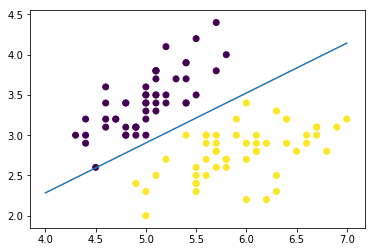

In [63]:
# Compute the decision boundary and make a plot of it, along with the data
m = -A.weights[0]/A.weights[1]
b = -A.bias/A.weights[1]

def line(x,m,b):
    return m*x + b
x = np.linspace(4,7,num=50)
plt.plot(x,line(x,m,b))
plt.scatter(sepal_length, sepal_width, c=colors)

plt.show()

----
# Assignment Wrap-up

Fill out the following Google Form before submitting your assignment to D2L!

In [59]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://goo.gl/forms/sxPAah1RyU3bCk0z1" 
	width="80%" 
	height="500px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

-----
### Congratulations, we're done!

Now, you just need to submit this assignment by uploading it to the course <a href="https://d2l.msu.edu/">Desire2Learn</a> web page for today's dropbox (Don't forget to add your names in the first cell).
